#Python Control Systems

**Table of Contents**
- Installation
- ODE Solver
- Laplace Transforms & Inverse Laplace Transforms 
  - Partial Fraction Expansion
- Modeling of Linear Systems
  - Transfer Function Models
  - State-space Models
  - Model Connections
- Linear System Response
  - Step Response
  - Impulse Response
  - Forced Response
- Basic Controllers
  - P, PI, PD, PID Controls
- Root Locus Analysis
- Frequency-Response Analysis
  - Bode Plot
  - Nyquist Plot
  - Lead & Lag Compensator Design


## Useful web resources

- [Dynamics & Control at APmonitor](https://apmonitor.com/pdc/index.php)
- [Dynamics & Control with Jupyter Notebooks](https://dynamics-and-control.readthedocs.io/en/latest/index.html)

## Signals
- Frequency ($f$): Number of cycles completed in one second. Unit is 1 Hz = $1s^{-1}$
- Time period ($T$): Time interval after which the signal repeats itself. SI unit is seconds. $f=\frac{1}{T}$.
- Magnitude: The value or strength of signal at anytime.  

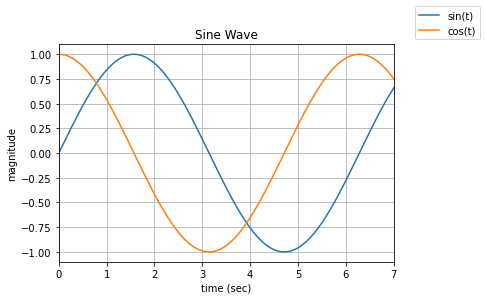

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

t = np.linspace(0, 20, 1000)
y = np.sin(t) # w = 1
y1 = np.sin(2*t) # w = 2
y2 = np.sin(3*t)
y3 = np.sin(4*t)
y4 = np.cos(t)
plt.plot(t, y, label='sin(t)')
#plt.plot(t, y1, label='sin(2t)')
#plt.plot(t, y2, label='sin(3t)')
#plt.plot(t, y3, label='sin(4t)')
plt.plot(t, y4, label='cos(t)')

plt.xlim((0,7))
plt.xlabel('time (sec)')
plt.ylabel('magnitude')
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1.0))
plt.title('Sine Wave')
plt.show()

## Linear and Nonlinear Functions

- Linear function follows the principle of superposition while nonlinear functions do not. 

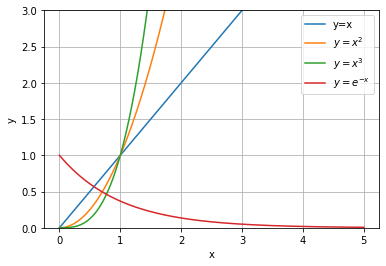

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 5, 1000)
y = x
y1 = x*x
y2 = np.power(x, 3.0)
#y2 = np.exp(x)
y3 = np.exp(-x)

plt.plot(x, y, label='y=x')
plt.plot(x, y1, label='$y=x^2$')
plt.plot(x, y2, label='$y=x^3$')
plt.plot(x, y3, label='$y=e^{-x}$')
plt.ylim((0,3))
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
plt.grid()


## Introduction to Sympy

Symbolic Computation Toolbox

- Find roots of polynomials
- Solving Equations
- Calculus
  - Differentiation
  - Integration
  - Limits
  - Taylor Series Expansion


In [ ]:
import sympy
sympy.init_printing()

In [ ]:
# polynomials
x = sympy.Symbol('x')
polynomial = (2*x + 3)**4
# polynomial.expand? # get help
polynomial.expand()

In [ ]:
# Factorization
(x**2 + 2*x + 1).factor()

### Differentiation

In [ ]:
# differentiation
polynomial.diff(x) # first derivative

In [ ]:
# second derivative
polynomial.diff(x, 2) 

In [ ]:
x, y, z = sympy.symbols('x, y, z')
f = sympy.exp(x*y*z)
sympy.diff(f, x)

In [ ]:
sympy.diff(f,y,2)

### Integration

In [ ]:
# indefinite integral
polynomial.integrate(x) 

In [ ]:
sympy.integrate(sympy.sec(x), x)

In [ ]:
# definite integral
polynomial.integrate((x, 1, 2))

In [ ]:
t, s = sympy.symbols('t, s')
a = sympy.Symbol('a', real=True, positive=True)
f = sympy.exp(-a*t)
f.integrate(t)


### Limits

In [ ]:
# find limit as x --> 0
sympy.limit((2*sympy.sin(x) - sympy.sin(2*x))/(x-sympy.sin(x)), x, 0)

In [ ]:
sympy.limit((sympy.cos(x)/x), x, 0)

In [ ]:
f = t * sympy.exp(-2*t)
sympy.limit(f, t, sympy.oo)

In [ ]:
f = (s*s-1)/(s-1)
sympy.limit(f, s, 0)

### Taylor Series Expansion

In [ ]:
# Taylor Series Expansion
nonlin_exprn = sympy.sin(x)
sympy.series(nonlin_exprn, x, 2, 2) # in terms of x around 2 with first two terms

### Convert Symbols into Numbers

In [ ]:
# Remove higher order terms
temp = sympy.series(nonlin_exprn, x, 2, 2)
temp.removeO()

In [ ]:
number = sympy.sqrt(2)*sympy.pi
number

In [ ]:
# convert symbol into floating point number
sympy.N(number*x)

In [ ]:
float(number)

### Solving Equations

In [ ]:
# solving equations
solutions = sympy.solve(2*x**2+2-4)
solutions

In [ ]:
# equations
eqn = sympy.Eq(2*x**2+2, 4)
eqn

In [ ]:
# roots of equation
sympy.roots(eqn)

In [ ]:
x, y = sympy.symbols('x, y')
sympy.solve([x + y - 2,
             x - y -0], [x, y])

In [ ]:
a, b, c = sympy.var('a, b, c')
solution = sympy.solve([a*x + b*y - 2,
                        a*x - b*y - c], [x, y])
solution

## Installation

In [ ]:
!pip install control > /dev/null 2>&1

## ODE Solver
- Solving ordinary differential equations in Python

$$\dot{x} = -0.3 x; x(0) = 5 $$

Here the system is driven by the initial condition. There is no external input.

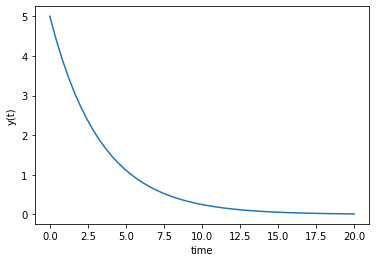

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dy/dt
def model(y,t):
    k = 0.3
    dydt = -k * y
    return dydt

# initial condition
y0 = 5

# time points
t = np.linspace(0,20)

# solve ODE
y = odeint(model,y0,t)

# plot results
plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()


### Effect of different values of constant k

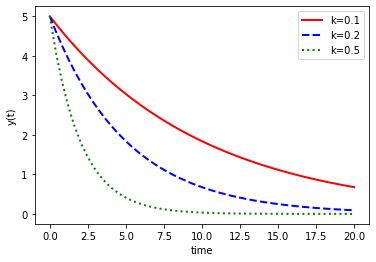

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dy/dt
def model(y,t,k):
    dydt = -k * y
    return dydt

# initial condition
y0 = 5

# time points
t = np.linspace(0,20)

# solve ODEs
k = 0.1
y1 = odeint(model,y0,t,args=(k,))
k = 0.2
y2 = odeint(model,y0,t,args=(k,))
k = 0.5
y3 = odeint(model,y0,t,args=(k,))

# plot results
plt.plot(t,y1,'r-',linewidth=2,label='k=0.1')
plt.plot(t,y2,'b--',linewidth=2,label='k=0.2')
plt.plot(t,y3,'g:',linewidth=2,label='k=0.5')
plt.xlabel('time')
plt.ylabel('y(t)')
plt.legend()
plt.show()

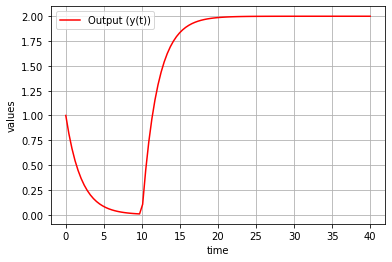

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dy/dt
def model(y,t):
    # u steps from 0 to 2 at t=10
    k = 0.5
    if t<10.0:
        u = 0
    else:
        u = 1
    dydt = -k*y + u
    return dydt

# initial condition
y0 = 1

# time points
t = np.linspace(0,40,100)

# solve ODE
y = odeint(model,y0,t)

# plot results
plt.plot(t,y,'r-',label='Output (y(t))')
#plt.plot([0,10,10,40],[0,0,2,2],'b-',label='Input (u(t))')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.grid()
plt.show()

### Solving ODE with External Input Signal
Consider the following dynamical system:
\begin{array}{l}
\dot{x} &=& (-x + u)/2.0 \\
\dot{y} &=& (-y + x)/5.0
\end{array}

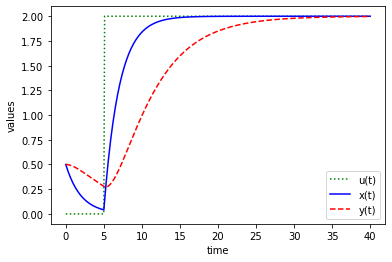

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dz/dt
def model(z,t,u):
    x = z[0]
    y = z[1]
    dxdt = (-x + u)/2.0
    dydt = (-y + x)/5.0
    dzdt = [dxdt,dydt]
    return dzdt

# initial condition
z0 = [0.5,0.5]

# number of time points
n = 401

# time points
t = np.linspace(0,40,n)

# step input
u = np.zeros(n)
# change to 2.0 at time = 5.0
u[51:] = 2.0

# store solution
x = np.empty_like(t)
y = np.empty_like(t)
# record initial conditions
x[0] = z0[0]
y[0] = z0[1]

# solve ODE
for i in range(1,n):
    # span for next time step
    tspan = [t[i-1],t[i]]
    # solve for next step
    z = odeint(model,z0,tspan,args=(u[i],))
    # store solution for plotting
    x[i] = z[1][0]
    y[i] = z[1][1]
    # next initial condition
    z0 = z[1]

# plot results
plt.plot(t,u,'g:',label='u(t)')
plt.plot(t,x,'b-',label='x(t)')
plt.plot(t,y,'r--',label='y(t)')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()

### Spring-Mass-Damper System
Dynamic System:
$$m\ddot{x}+b\dot{x}+kx = F(t)$$

Set of first order differential equations:
$x_1 = x$ and $x_2 = \dot{x}_1$
this gives,
$\dot{x}_2 = \ddot{x}_1 = \frac{F - Kx - b\dot{x}}{m}$
\begin{array}{l}
\dot{x}_1 = x_2 \\
\dot{x}_2 = -\frac{k}{m}x_1 - \frac{b}{m}x_2 + \frac{1}{m}F(t)
\end{array}
where $m=1,b=0.1,k=1$ and $F(t) = u(t)-u(t-1);\ x(0)=0,\ \dot{x}(0) = 0$

idx =  125


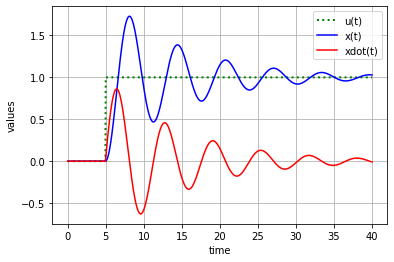

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math

# function that returns dz/dt
def model(x,t,u):
  # x[0] = x_1, x[1] = x_2
  k = 1.0
  b = 0.2 # try various values of damping
  m = 1.0
  x1dot = x[1]
  x2dot = -(k/m) * x[0] - (b/m) * x[1] + (u/m)
  dxdt = [x1dot, x2dot]
  return dxdt

# initial condition
z0 = [0,0]

# number of time points
n = 1001

# time points
tmax = 40
t = np.linspace(0,tmax,n)

# step input at t = 5
u = np.zeros(n)
idx = math.floor(5*n/tmax)
u[idx:] = 1.0
print('idx = ', idx)

# # pulse input
# u = np.zeros(n)
# # index for t = 1 secon
# idx1 = math.floor(1*n/tmax)
# idx2 = math.floor(5*n/tmax) 
# u[idx1:idx2] = 1.0  # pulse


# store solution
x = np.empty_like(t)
xdot = np.empty_like(t)
# record initial conditions
x[0] = z0[0]
xdot[0] = z0[1]

# solve ODE
for i in range(1, n):
    # span for next time step
    tspan = [t[i-1],t[i]]
    # solve for next step
    z = odeint(model,z0,tspan,args=(u[i],))
    # store solution for plotting
    x[i] = z[1][0]
    xdot[i] = z[1][1]
    # next initial condition
    z0 = z[1]

# plot results
plt.plot(t,u,'g:',label='u(t)', lw = 2)
plt.plot(t,x,'b-',label='x(t)')
plt.plot(t,xdot,'r-',label='xdot(t)')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.grid()
plt.show()

### Series RLC Circuit

Dynamic System:
$L\ddot{q}(t) + R\dot{q}(t) + \frac{1}{c}q(t) = V(t)$

Assume $x_1 = q$ and $x_2 = \dot{q}$. 

State space equations:
\begin{array}{l}
\dot{x}_1 = x_2 \\
\dot{x}_2 = -\frac{R}{L}x_2 -\frac{1}{LC}x_1 + \frac{1}{L}V(t)
\end{array}
Assume $R=1,\ L=1, \ C=1$ and Initial conditions: $x_1(0) = 0,\ x_2(0) = 0$

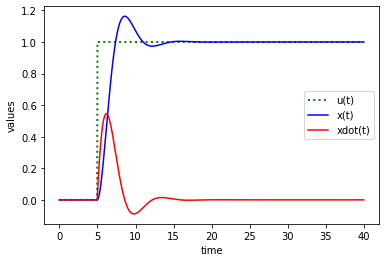

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math

# function that returns dz/dt
def model(x,t,u):
  R = 1.0
  L = 1.0
  C = 1.0
  x1dot = x[1]
  x2dot = -(1/(L*C)) * x[0] - (R/L) * x[1] + (u/L)
  dxdt = [x1dot, x2dot]
  return dxdt

# initial condition
z0 = [0,0]

# number of time points
n = 1001

# time points
tmax = 40
t = np.linspace(0,tmax,n)

# step input at t = 5
u = np.zeros(n)
idx = math.floor(5*n/tmax)
u[idx:] = 1.0


# # pulse input
# u = np.zeros(n)
# idx1 = math.floor(1*n/tmax)
# idx2 = math.floor(5*n/tmax) 
# u[idx1:idx2] = 1.0  # pulse


# store solution
x = np.empty_like(t)
xdot = np.empty_like(t)
# record initial conditions
x[0] = z0[0]
xdot[0] = z0[1]

# solve ODE
for i in range(1, n):
    # span for next time step
    tspan = [t[i-1],t[i]]
    # solve for next step
    z = odeint(model,z0,tspan,args=(u[i],))
    # store solution for plotting
    x[i] = z[1][0]
    xdot[i] = z[1][1]
    # next initial condition
    z0 = z[1]

# plot results
plt.plot(t,u,'g:',label='u(t)', lw = 2)
plt.plot(t,x,'b-',label='x(t)')
plt.plot(t,xdot,'r-',label='xdot(t)')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()

## Nonlinear Systems
- Simple Pendulum
- Lorentz Attractor
- Vander-pol oscillator


### Simple Pendulum
System Dynamics:
$ml^2\ddot{\theta} + mgl\sin(\theta) + k\dot{\theta} = 0$

State space model:
\begin{array}{l}
\dot{x}_1 = x_2 \\
\dot{x}_2 = -\frac{g}{l}\sin(x_1) - \frac{k}{ml^2}x_2 
\end{array}

Linearized Model: $\dot{x} = A x$ where $A =\begin{bmatrix}0 & 1 \\
- \frac{g}{l} & -\frac{k}{ml^2} \end{bmatrix}$

where $m = 1,\ k = 0.2,\ g = 9.8,\ l = 1$

shape of z: (100, 2)


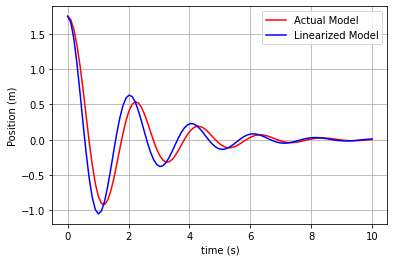

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math

# function that returns dy/dt
def non_linear_model(x,t):
    m = 0.5
    k = 0.5
    g = 9.8
    l = 1
    xdot = x[1]
    xddot = -(g/l) * math.sin(x[0]) - (k/(m*l*l)) * x[1]

    dxdt = [xdot, xddot]
    return dxdt

# function that returns dy/dt
def linear_model(x,t):
    m = 0.5
    k = 0.5
    g = 9.8
    l = 1
    xdot = x[1]
    xddot = -(g/l) * x[0] - k/(m*l*l) * x[1]

    dxdt = [xdot, xddot]
    return dxdt

# initial condition
z0 = [1.75, 0] # try different values between 0 and 2.0

# time points
t = np.linspace(0,10, 100)

# solve ODE
z1 = odeint(non_linear_model,z0,t)
z2 = odeint(linear_model,z0,t)

print('shape of z:', np.shape(z1))

# plot results
plt.plot(t,z1[:,0], 'r-', label='Actual Model')
plt.plot(t, z2[:,0], 'b-', label='Linearized Model')
plt.xlabel('time (s)')
plt.ylabel('Position (m)')
plt.legend(loc='best')
plt.grid()
plt.show()


### Stable and Unstable Equilibrium Points
- System equation $\dot{x} = -x + x^2$

- $x_0 = 0$ is the stable equilibrium point and 
- $x_0=-1$ is an unstable equilibrium point.

/usr/local/lib/python3.6/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/usr/local/lib/python3.6/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/usr/local/lib/python3.6/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


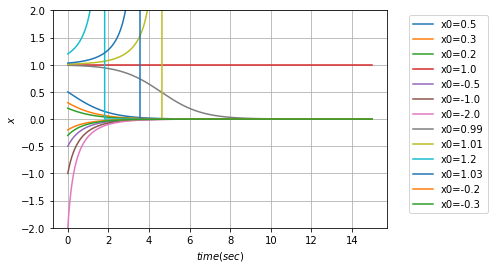

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dz/dt
def model(x,t):
  xdot = -x + x*x
  return xdot

# initial condition
x0 = [0.5, 0.3, 0.2, 1.0, -0.5, -1.0, -2.0, 0.99, 1.01, 1.2, 1.03, -0.2, -0.3]

# number of time points
n = 1000

fig = plt.figure()

# time points
t = np.linspace(0,15,n)

for i in range(len(x0)):
  x00 = x0[i]
  x = odeint(model, x00, t)
  plt.plot(t, x, '-', label='x0={}'.format(x0[i]))
  plt.ylim((-2,2))

plt.grid()
plt.xlabel('$time (sec)$')
plt.ylabel('$x$')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

### Lorentz Attractor

State-space model

\begin{eqnarray}
\dot{x} &=& \sigma(y-x) \\
\dot{y} &=& (\rho - z)x - y \\
\dot{z} &=& xy - \beta z
\end{eqnarray}

where $\sigma = 10$, $\rho = 28$ and $\beta = 8/3$. 

Text(0.5, 0, 'Z')

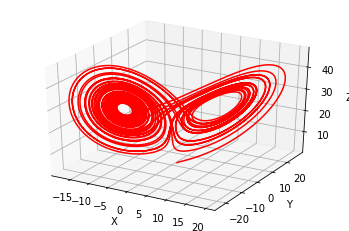

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dz/dt
def model(Z,t):
  sigma = 10.0
  rho = 28.0
  beta = 8.0/3.0
  x = Z[0]
  y = Z[1]
  z = Z[2]
  dxdt = sigma * (y - x)
  dydt = rho * x - y - x * z
  dzdt = x * y - beta * z
  dz = [dxdt, dydt, dzdt]
  return dz

# initial condition
z0 = [1, 1, 1]

# number of time points
n = 10000

# time points
t = np.linspace(0,40,n)
# solve ODE
Z = odeint(model, z0, t)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(Z[:,0], Z[:,1], Z[:,2], 'r-')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')


### Lorentz attractor for different initial conditions
- State trajectories never intersect each other. 
- It never repeats itself. 
- Slight change in initial conditions leads to a completely different path for the state trajectory.
- Even though the output behaviour is random, there is underlying pattern here which looks like butterfly wings. 

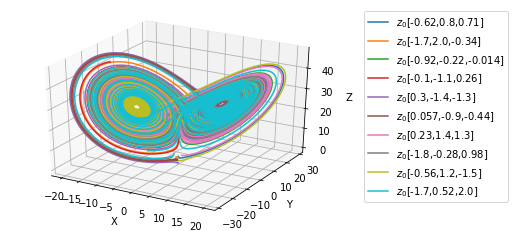

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dz/dt
def model(Z,t):
  sigma = 10.0
  rho = 28.0
  beta = 8.0/3.0
  x = Z[0]
  y = Z[1]
  z = Z[2]
  dxdt = sigma * (y - x)
  dydt = rho * x - y - x * z
  dzdt = x * y - beta * z
  dz = [dxdt, dydt, dzdt]
  return dz

# initial condition
z00 = np.random.uniform(-2, 2, size=(10,3))

# number of time points
n = 10000

# time points
t = np.linspace(0,30,n)

fig = plt.figure()
ax = plt.axes(projection='3d')
for k in range(np.shape(z00)[0]):
  z0 = z00[k]
  # solve ODE
  Z = odeint(model, z0, t)
  # plot
  ax.plot3D(Z[:,0], Z[:,1], Z[:,2], 
            label='$z_0$[{:.2},{:.2},{:.2}]'\
            .format(z0[0],z0[1],z0[2]))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.legend(bbox_to_anchor=(1.05,1))

### Vander-Pol Oscillator

$$\ddot{x}+\mu(x^2-1)\dot{x}+x = 0$$

- It exhibits __limit_cycles__. 
- Different intial conditions lead to different state trajectories which ultimately end up in this limit cycle which is a sustained oscillation of constant frequency and magnitude. 

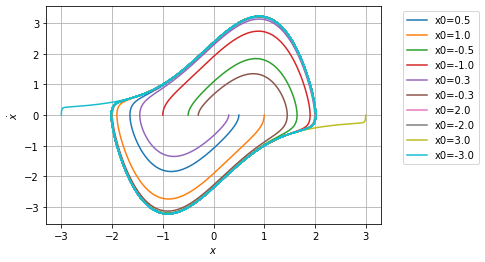

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dz/dt
def model(z,t):
  mu = 1.5
  x = z[0]
  xdot = z[1]
  xddot = -x + mu * (1 - x*x)*xdot
  dz = [xdot, xddot]
  return dz

# initial condition
z00 = [0.5, 1.0, -0.5, -1.0, 0.3, -0.3, 2.0, -2.0, 3.0, -3.0]

# number of time points
n = 10000

fig = plt.figure()
# time points
t = np.linspace(0,40,n)

for i in range(len(z00)):
  z0 = [z00[i], 0]
  z = odeint(model, z0, t)
  plt.plot(z[:,0],z[:,1], label='x0={}'.format(z00[i]))

plt.grid()
plt.xlabel('$x$')
plt.ylabel('$\dot{x}$')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

## Laplace Transforms & Inverse Laplace transforms
- Converting from time-domain to frequency-domain
- Differential and Integrals in time-domain become algebraic equations in frequency domain making it easier to analyze system responses.

Laplace Transforms:

$F(s) = \int_0^\infty f(t)e^{-st}dt$

Inverse Laplace Transforms:

$\displaystyle f(t) = \mathscr{L}^{-1}[F(s)] = \frac{1}{2\pi j}\int_{c-j\infty}^{c+j\infty} F(s)e^{st}ds,\ t>0$


In [ ]:
import sympy as sym
from sympy.abc import s,t,x,y,z
from sympy.integrals import laplace_transform
from sympy.integrals import inverse_laplace_transform

# Laplace transform (t->s)
U = laplace_transform(5*t, t, s)
print('U')
print(U[0])
# Result: 5/s**2

# Inverse Laplace transform (s->t)
X = inverse_laplace_transform(U[0],s,t)
print('X')
print(X)
# Result: 5*t*Heaviside(t)

# Function
F = 5*(s+1)/(s+3)**2
print('F')
print(F)
# Result: (5*s + 5)/(s + 3)**2

# Partial fraction decomposition
G = sym.apart(F)
print('G')
print(G)
# Result: 5/(s + 3) - 10/(s + 3)**2

# denominator of transfer function
d1 = (s+1)*(s+3)*(s**2+3*s+1)

# expand polynomial
d2 = sym.expand(d1)
print('d2')
print(d2)
# Result: s**4 + 7*s**3 + 16*s**2 + 13*s + 3

# find roots
print(sym.roots(d2))
# Result: {-1: 1, -3: 1, -3/2 - sqrt(5)/2: 1, -3/2 + sqrt(5)/2: 1}

U
5/s**2
X
5*t*Heaviside(t)
F
(5*s + 5)/(s + 3)**2
G
5/(s + 3) - 10/(s + 3)**2
d2
s**4 + 7*s**3 + 16*s**2 + 13*s + 3
{-1: 1, -3: 1, -3/2 - sqrt(5)/2: 1, -3/2 + sqrt(5)/2: 1}


In [ ]:
import sympy
sympy.init_printing()

t = sympy.Symbol('t')
s = sympy.Symbol('s')
a = sympy.Symbol('a', real=True, positive=True)

# function in time domain
f = sympy.exp(-a*t)
f

In [ ]:
# compute laplace transformation using integration
sympy.integrate(f*sympy.exp(-s*t), (t, 0, sympy.oo))

⎧       1                                          π
⎪   ─────────      for │periodic_argument(s, ∞)│ ≤ ─
⎪     ⎛a    ⎞                                      2
⎪   s⋅⎜─ + 1⎟                                       
⎪     ⎝s    ⎠                                       
⎪                                                   
⎨∞                                                  
⎪⌠                                                  
⎪⎮  -a⋅t  -s⋅t                                      
⎪⎮ ℯ    ⋅ℯ     dt              otherwise            
⎪⌡                                                  
⎪0                                                  
⎩                                                   

In [ ]:
sympy.laplace_transform(f, t, s)

(1/(a + s), 0, True)

In [ ]:
F = sympy.laplace_transform(f, t, s, noconds=True)
F

In [ ]:
# inverse laplace transform
inv_F = sympy.inverse_laplace_transform(F, s, t)
inv_F

In [ ]:
# unit step function
sympy.Heaviside(t)

/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


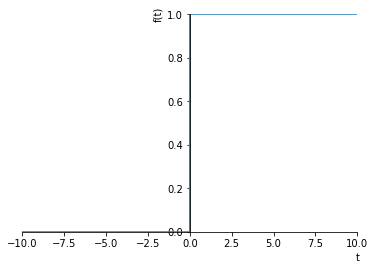

In [ ]:
sympy.plot(sympy.Heaviside(t))

In [ ]:
sympy.laplace_transform(sympy.Heaviside(t), t, s, noconds=True)

In [ ]:
inv_F.subs({a: 2})

/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


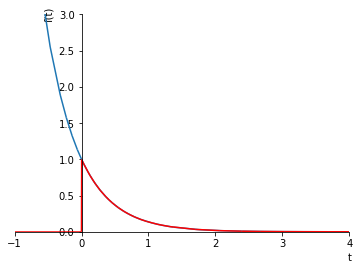

In [ ]:
p = sympy.plot(f.subs({a: 2}), inv_F.subs({a: 2}),
               xlim=(-1, 4), ylim=(0, 3), show=False)
p[1].line_color = 'red'
p.show()

In [ ]:
import sympy
sympy.init_printing()
def L(f):
  return sympy.laplace_transform(f, t, s, noconds=True)

def invL(F):
    return sympy.inverse_laplace_transform(F, s, t)


In [ ]:
# Compute Laplace Transform of following functions
t = sympy.Symbol('t')
s = sympy.Symbol('s')
a = sympy.Symbol('a', real=True, positive=True)
omega = sympy.Symbol('omega', real=True)
exp = sympy.exp
sin = sympy.sin
cos = sympy.cos
functions = [1,
         t,
         exp(-a*t),
         t*exp(-a*t),
         t**2*exp(-a*t),
         sin(omega*t),
         cos(omega*t),
         1 - exp(-a*t),
         exp(-a*t)*sin(omega*t),
         exp(-a*t)*cos(omega*t),
         ]
functions

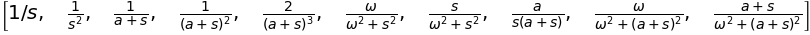

In [ ]:
# compute Laplace transforms
Fs = [L(f) for f in functions]
Fs

In [ ]:
from pandas import DataFrame

In [ ]:
def makelatex(args):
  #return ["${}$".format(sympy.latex(a)) for a in args]
  return [a for a in args]

In [ ]:
DataFrame(list(zip(makelatex(functions), makelatex(Fs))))

,0,1
0,1,1/s
1,t,s**(-2)
2,exp(-a*t),1/(a + s)
3,t*exp(-a*t),(a + s)**(-2)
4,t**2*exp(-a*t),2/(a + s)**3
5,sin(omega*t),omega/(omega**2 + s**2)
6,cos(omega*t),s/(omega**2 + s**2)
7,1 - exp(-a*t),a/(s*(a + s))
8,exp(-a*t)*sin(omega*t),omega/(omega**2 + (a + s)**2)
9,exp(-a*t)*cos(omega*t),(a + s)/(omega**2 + (a + s)**2)


In [ ]:
n = sympy.Symbol('n', integer=True, positive=True)
f = t**(n)
F=L(f)
F


In [ ]:
F.subs({n: 5})

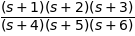

In [ ]:
F = ((s + 1)*(s + 2)* (s + 3))/((s + 4)*(s + 5)*(s + 6))
F

In [ ]:
F.apart()

In [ ]:
invL(F.apart())

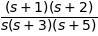

In [ ]:
F = (s+1)*(s+2)/(s*(s+3)*(s+5))
F

In [ ]:
invL(F)

In [ ]:
invL(1/(s**2))


In [ ]:
omega = sympy.Symbol('omega', real=True)
invL((omega)/(s**2 + omega*omega))

In [ ]:
f = 

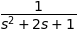

In [ ]:
F = 1/(s**2 + 2*s + 1)
F

In [ ]:
invL(F)

### Partial Fraction Expansion


1/(s**2*(s**2 + 1))


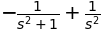

In [ ]:
import sympy as sym
sym.init_printing()
from sympy.abc import s,t,x,y,z

f = 1/(s**2*(s**2+1))

print(f)

# PFE
sym.apart(f)


In [ ]:
import sympy as sym
from sympy.abc import s

F = (s+3)/((s+1)*(s+2))

# PFE
sym.apart(F)

-1/(s + 2) + 2/(s + 1)

In [ ]:
import sympy as sym
from sympy.abc import s
import numpy as np

F = (s**2+2*s+3)/(s+1)**3

# PFE
print('PFE: ', sym.apart(F))

# method 2 - verification
var = sym.var('A:C')

p1 = A/(s+1)**3
p2 = B/(s+1)**2
p3 = C/(s+1)

h = p1 + p2 + p3
print(h)

h1 = sym.together(h)
print(h1)

f1 = sym.factor(h1, s)
print(f1)

e1 = sym.Eq(f1, F)
print(e1)

eq = sym.Eq(sym.numer(e1.lhs), sym.numer(e1.rhs))
print(eq)
coeff = sym.solve_undetermined_coeffs(eq, [A,B,C], s)
print(coeff)

h1.subs(coeff)
print(h1)

PFE:  1/(s + 1) + 2/(s + 1)**3
A/(s + 1)**3 + B/(s + 1)**2 + C/(s + 1)
(A + B*(s + 1) + C*(s + 1)**2)/(s + 1)**3
(A + B + C*s**2 + C + s*(B + 2*C))/(s + 1)**3
Eq((A + B + C*s**2 + C + s*(B + 2*C))/(s + 1)**3, (s**2 + 2*s + 3)/(s + 1)**3)
Eq(A + B + C*s**2 + C + s*(B + 2*C), s**2 + 2*s + 3)
{A: 2, B: 0, C: 1}
(A + B*(s + 1) + C*(s + 1)**2)/(s + 1)**3


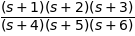

In [ ]:
F = ((s + 1)*(s + 2)* (s + 3))/((s + 4)*(s + 5)*(s + 6))
F

In [ ]:
F.apart()

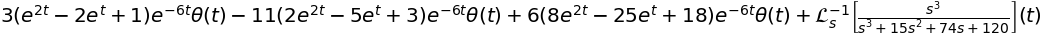

In [ ]:
# invL is defined above
import sympy
invL(F)

In [ ]:
invL(F.apart())

## Linear System Models
- State Space Models
- Transfer Function Models
- Model Connections

In [ ]:
from control import *
a = [[0,1],[-1,-1]]
b = [[0],[1]]
c = [1, 0]
d = 0
sys = ss(a,b,c,d)
print(sys)

g = tf(1, [1,1,1])
print(g)

# casting TF to SS
sys2 = ss(g)
print(sys2)

# casting SS to TF
g2 = tf(sys)
print(g2)

A = [[ 0.  1.]
 [-1. -1.]]

B = [[0.]
 [1.]]

C = [[1. 0.]]

D = [[0.]]


     1
-----------
s^2 + s + 1

A = [[-1. -1.]
 [ 1.  0.]]

B = [[1.]
 [0.]]

C = [[0. 1.]]

D = [[0.]]


     1
-----------
s^2 + s + 1



### Model Interconnections
- Series
- Parallel
- Feedback

In [ ]:
from control import *

g1 = tf(1,[1,1])
g2 = tf(1, [1,2])

# Parallel connection
g3 = parallel(g1,g2)
print(g3)

# series connection
g4 = series(g1,g2)
print(g4)

# Feedback connection
g5 = feedback(g1,g2,-1) 
print(g5)


   2 s + 3
-------------
s^2 + 3 s + 2


      1
-------------
s^2 + 3 s + 2


    s + 2
-------------
s^2 + 3 s + 3



## Block Diagram Reduction

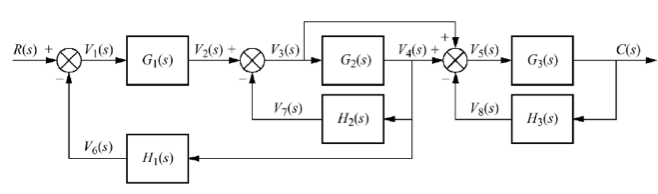


\begin{array}{l}
V_2 = G_1V_1 \\
V4 = G_2V_3\\
C = G_3V_5\\
V_6 = H_1V_4 \\
V_7 = V_4H_2 \\
V_8 = H_3 C
\end{array}

\begin{array}{l}
V_1 = R - V_6\\
V_3 = V_2 - V_7\\
V_5 = V_4 + V_3 - V_8
\end{array}

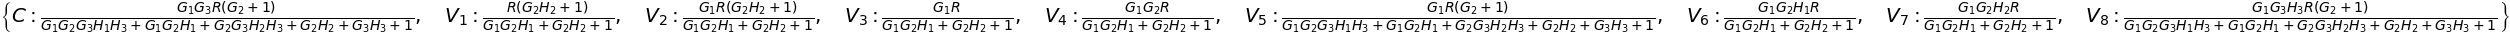

In [ ]:
import sympy
sympy.init_printing()

# Symbols
(R, V1, V2, V3, V4, V5, V6, V7, V8, C,
 G1, G2, G3, H1, H2, H3) = sympy.symbols('R, V1, V2, V3, V4, V5, V6, V7, V8, C,'
                                         'G1, G2, G3, H1, H2, H3')
unknowns = V1, V2, V3, V4, V5, V6, V7, V8, C


eqs = [# Blocks
       V2 - G1*V1,
       V4 - G2*V3,
       C - G3*V5,
       V6 - H1*V4,
       V7 - H2*V4,
       V8 - H3*C,
       # Sums
       V1 - (R - V6),
       V3 - (V2 - V7),
       V5 - (V4 + V3 - V8),
       ]

# solve equations

sol = sympy.solve(eqs, unknowns)
sol


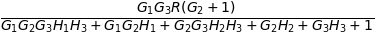

In [ ]:
# Output is given by
sol[C]

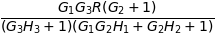

In [ ]:
sol[C].factor()

In [ ]:
sympy.latex(sol[C].factor())

'\\frac{G_{1} G_{3} R \\left(G_{2} + 1\\right)}{\\left(G_{3} H_{3} + 1\\right) \\left(G_{1} G_{2} H_{1} + G_{2} H_{2} + 1\\right)}'

In [ ]:
import sympy
sympy.init_printing(pretty_print=False)

# Symbols
(R, V1, V2, V3, V4, V5, V6, V7, C,
 G1, G2, G3, H1, H2) = sympy.symbols('R, V1, V2, V3, V4, V5, V6, V7, C,\
                                         G1, G2, G3, H1, H2')
unknowns = V1, V2, V3, V4, V5, V6, V7, C

eqs = [# Blocks
       V3 - G1*V2,
       V5 - G2*V4,
       C - G3*V5,
       V6 - H2*C,
       V7 - H1*V5,
       # Sums
       V1 - (R - C),
       V2 - (V1 + V7),
       V4 - (V3 - V6),
       ]

# solve equations

sol = sympy.solve(eqs, unknowns)
sol[C]

G1*G2*G3*R/(G1*G2*G3 - G1*G2*H1 + G2*G3*H2 + 1)

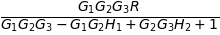

In [ ]:
sol[C]

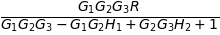

In [ ]:
sol[C].factor()

In [ ]:
sympy.latex(sol[C].factor())

'\\frac{G_{1} G_{2} G_{3} R}{G_{1} G_{2} G_{3} - G_{1} G_{2} H_{1} + G_{2} G_{3} H_{2} + 1}'

## Response of Linear Systems
- Step Response
- Impulse Response
- Forced Response
- Initial Condition Response

### Step response



     1
-----------
s^2 + s + 1



Text(0, 0.5, 'y')

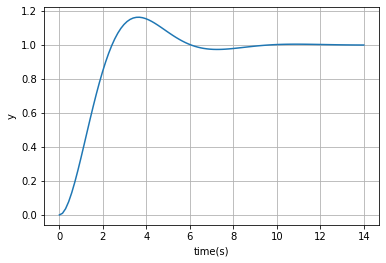

In [ ]:
from control import *
import matplotlib.pyplot as plt

g = tf(1, [1,1,1])
print(g)

# step response
t,y = step_response(g)

plt.plot(t,y)
plt.grid()
plt.xlabel('time(s)')
plt.ylabel('y')


### Impulse Response

Text(0, 0.5, 'y')

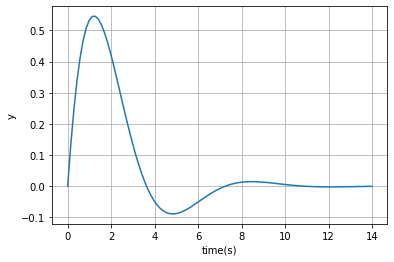

In [ ]:
from control import *
import matplotlib.pyplot as plt

g = tf(1, [1,1,1])

t,y = impulse_response(g)

plt.plot(t,y)
plt.grid()
plt.xlabel('time(s)')
plt.ylabel('y')

Text(0, 0.5, 'y')

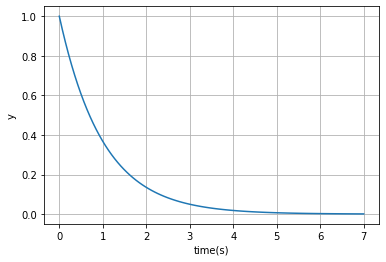

In [ ]:
from control import *
import matplotlib.pyplot as plt

g = tf(1, [1,1])
t,y = impulse_response(g)

plt.plot(t,y)
plt.grid()
plt.xlabel('time(s)')
plt.ylabel('y')

### Initial Response

Text(0, 0.5, 'y')

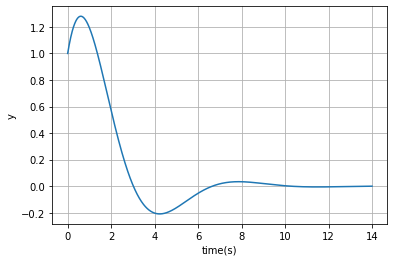

In [ ]:
from control import *
a = [[0,1],[-1,-1]]
b = [[0],[1]]
c = [1, 0]
d = 0
sys = ss(a,b,c,d)

t,y = initial_response(sys, X0=[1,1])

plt.plot(t,y)
plt.grid()
plt.xlabel('time(s)')
plt.ylabel('y')

### Forced Response

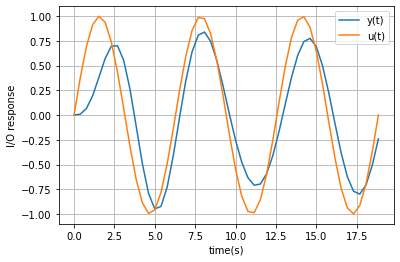

In [ ]:
from control import *
from math import pi
import numpy as np

g = tf([1,2],[1,2,3,4])
t = np.linspace(0, 6*pi)
u = np.sin(t)

t,y,x = forced_response(g,t,u)

plt.plot(t,y,label='y(t)')
plt.plot(t,u,label='u(t)')
plt.grid()
plt.xlabel('time(s)')
plt.ylabel('I/O response')
plt.legend(loc='best')

### Ramp Response


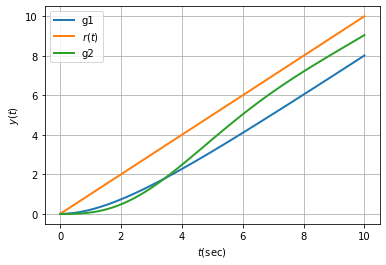

In [ ]:
from control import *
import matplotlib.pyplot as plt
import numpy as np

g1 = tf(1, [2,1]) # first order system
g2 = tf(1, [2, 1, 1]) # second order system

t = np.linspace(0,10, 100)
u = t
t,y1,x1 = forced_response(g1,t,u)
t,y2,x2 = forced_response(g2,t,u)
plt.plot(t,y1, lw = 2, label='g1')
plt.plot(t,u, lw = 2, label='$r(t)$')
plt.plot(t,y2,lw = 2, label='g2')
plt.grid()
plt.xlabel('$t$(sec)')
plt.ylabel('$y(t)$')
plt.legend(loc='best')

### Second order system

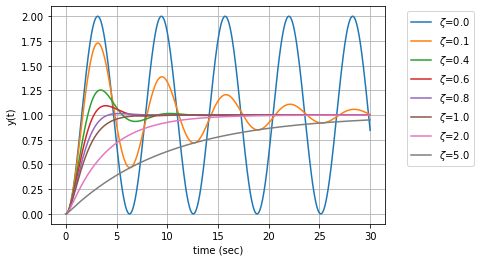

In [ ]:
from control import *
import matplotlib.pyplot as plt
import numpy as np

zeta = [0.0, 0.1, 0.4, 0.6, 0.8, 1.0, 2.0, 5.0]
wn = 1.0

t = np.linspace(0,30, 1000)

# plot response for each value of zeta
for i in range(len(zeta)):

  g = tf(wn*wn, [1, 2*zeta[i]*wn, wn*wn])
  t,y = step_response(g,t)
  plt.plot(t,y, label='$\zeta$={}'.format(zeta[i]))
  
plt.grid()
plt.xlabel('time (sec)')
plt.ylabel('y(t)')
plt.legend(bbox_to_anchor=(1.05,1))


### DC Motor Control
- Position feedback
- With Velocity feedback - improves transient response of the CL system with lower rise time, lower peak overshoot etc. 


   1
-------
s^2 + s


    1
---------
s^2 + 2 s


     1
-----------
s^2 + s + 1


      1
-------------
s^2 + 2 s + 1



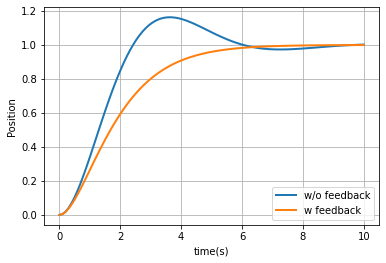

In [ ]:
from control import *
import matplotlib.pyplot as plt
import numpy as np

K = 1.0
J = 1.0
B = 1.0
H = 1.0  # velocity feedback gain

# open-loop system
g1 = tf(K, [J, B, 0])
print(g1)

# open-loop system with velocity feedback
g2 = tf(K, [J, (B+K*H), 0])
print(g2)

# closed-loop system
gc1 = feedback(g1, 1, -1) 
print(gc1)
gc2 = feedback(g2, 1, -1)
print(gc2)

t = np.linspace(0, 10, 100)
t,y1 = step_response(gc1,t)
t,y2 = step_response(gc2,t)
plt.plot(t,y1, lw = 2, label='w/o feedback')
plt.plot(t,y2, lw = 2, label='w feedback')
plt.grid()
plt.xlabel('time(s)')
plt.ylabel('Position')
plt.legend(loc='best')

## Basic Controllers
- P Controllers
- Integral Controllers
- PD controllers
- PD controllers
- PID controllers

### Closed-loop and Open-loop system response
- It shows the effect of simple negative feedback.
- Negative feedback stabilizes the system.
- Open-loop system is unstable.
- Positive feedback destabilizes the system.

Open-loop system: 
   1
-------
s^2 + s

Closed-loop system with negative feedback: 
     1
-----------
s^2 + s + 1

Closed-loop system with positive feedback: 
     1
-----------
s^2 + s - 1



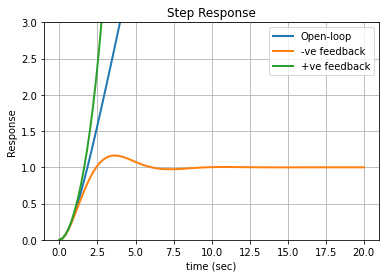

In [ ]:
from control import *
import matplotlib.pyplot as plt
import numpy as np

# open-loop system
g1 = tf(1, [1, 1, 0])
print('Open-loop system:', g1)

# closed-loop system
gc1 = feedback(g1, 1, -1) # negative feedback
print('Closed-loop system with negative feedback:', gc1)
gc2 = feedback(g1, 1, 1) # positive feedback
print('Closed-loop system with positive feedback:', gc2)

t = np.linspace(0,20,100)
t,y = step_response(g1, t)
t,y1 = step_response(gc1, t)
t,y2 = step_response(gc2, t)

plt.plot(t, y, lw = 2, label='Open-loop')
plt.plot(t, y1, lw = 2, label='-ve feedback')
plt.plot(t, y2, lw = 2, label='+ve feedback')
plt.ylim((0,3))
plt.xlabel('time (sec)')
plt.ylabel('Response')
plt.title('Step Response')
plt.grid()
plt.legend(loc='best')

### Liquid-level Control System
- Effect of Integral Action
  - PI Controller: $C(s) = K_p + \frac{K_i}{s}$
  - Open loop system does not have a integrator. So, the closed-loop step response has a steady-state error. 
  - Integral action eliminates SS error but may introduce oscillations



Open loop plant:  
  1
-----
s + 1

Closed-loop system with proportional control: 
  1
-----
s + 2

Closed-loop system with Integral Control: 
     1
-----------
s^2 + s + 1



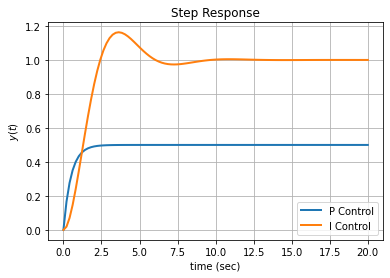

In [ ]:
from control import *
import matplotlib.pyplot as plt
import numpy as np

# constants
K, R, C = 1, 1, 1

# plant
g = tf(R, [R*C, 1])
print('Open loop plant: ', g)

# controller
c = tf(K,[1, 0])

# closed-loop system
gc1 = feedback(g, 1, -1) # without integrator
print('Closed-loop system with proportional control:', gc1)

gc2 = feedback(series(g,c), 1, -1) # with integrator
print('Closed-loop system with Integral Control:', gc2)

t = np.linspace(0,20,100)
t,y1 = step_response(gc1, t)
t,y2 = step_response(gc2, t)

plt.plot(t, y1, lw = 2, label='P Control')
plt.plot(t, y2, lw = 2, label='I Control')
#plt.ylim((0,3))
plt.xlabel('time (sec)')
plt.ylabel('$y(t)$')
plt.title('Step Response')
plt.grid()
plt.legend(loc='best')

### Inertial Load System
- Study the effect of derivative control action
- PD controller: $C(s) = K_p + K_ds$

Open loop plant:  
 1
---
s^2

Closed-loop system with proportional control: 
   1
-------
s^2 + 1

Closed-loop system with PD Control: 
   s + 1
-----------
s^2 + s + 1



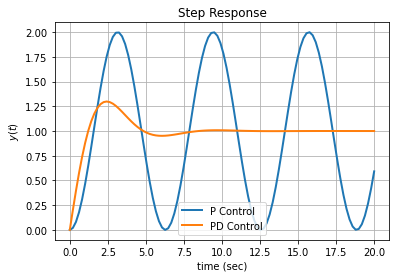

In [ ]:
from control import *
import matplotlib.pyplot as plt
import numpy as np

# constants
J, Kp, Kd = 1, 1, 1

# plant g = 1/Js^2
g = tf(1, [J, 0, 0])
print('Open loop plant: ', g)

# Prop controller
c1 = tf(Kp, [1])
# PD controller
c2 = tf([Kd, Kp],[1])

# closed-loop system
gc1 = feedback(series(c1, g), 1, -1) 
print('Closed-loop system with proportional control:', gc1)

gc2 = feedback(series(c2,g), 1, -1) 
print('Closed-loop system with PD Control:', gc2)

t = np.linspace(0,20,100)
t,y1 = step_response(gc1, t)
t,y2 = step_response(gc2, t)

plt.plot(t, y1, lw = 2, label='P Control')
plt.plot(t, y2, lw = 2, label='PD Control')
#plt.ylim((0,3))
plt.xlabel('time (sec)')
plt.ylabel('$y(t)$')
plt.title('Step Response')
plt.grid()
plt.legend(loc='best')

### DC Motor Controller
- Effect of P, PD and PID control action.
- Higher value of Kp reduces steady-state error.
- PI eliminates steady-state error but leads to oscillations. 
- PD increases damping and improves the speed of system response.
- Derivative controller, by itself, does not have any effect on steady-state error.
- PID provides the best of PI and PD control action.

Open loop plant:  
     1
-----------
s^2 + 0.5 s

Closed-loop system with P control with Kp = 1: 
       1
---------------
s^2 + 0.5 s + 1

Closed-loop system with P control with Kp = 4: 
       1
---------------
s^2 + 0.5 s + 4

Closed-loop system with PI Controller: 
           s
-----------------------
s^3 + 0.5 s^2 + 4 s + 1

Closed-loop system with PD Controller: 
       1
---------------
s^2 + 1.5 s + 4

Closed-loop system with PID Controller: 
           s
-----------------------
s^3 + 1.5 s^2 + 4 s + 1



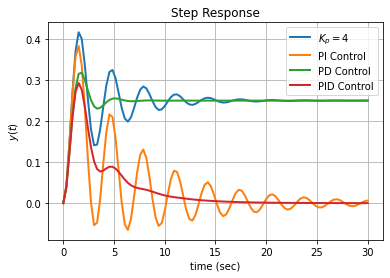

In [ ]:
from control import *
import matplotlib.pyplot as plt
import numpy as np

# constants
J, b = 1, 0.5

Kp1 = 1
Kp2 = 4

Ki = 1.0
Kd = 1.0

# plant
g = tf(1, [J, b, 0])
print('Open loop plant: ', g)

# PI controller
c1 = tf([Kp2, Ki],[1, 0])

# PD controller
c2 = tf([Kd, Kp2],[1])

# PID Controller
c3 = tf([Kd, Kp2, Ki],[1, 0])

# closed-loop system 
gc1 = feedback(g, Kp1, -1) # prop cont
print('Closed-loop system with P control with Kp = {}:'.format(Kp1), gc1)

gc2 = feedback(g, Kp2, -1)
print('Closed-loop system with P control with Kp = {}:'.format(Kp2), gc2)

gc3 = feedback(g, c1, -1) # PI control
print('Closed-loop system with PI Controller:', gc3)

gc4 = feedback(g, c2, -1) # PD controller
print('Closed-loop system with PD Controller:', gc4)

gc5 = feedback(g, c3, -1) # PID controller
print('Closed-loop system with PID Controller:', gc5)

t = np.linspace(0,30,100)
t,y1 = step_response(gc1, t)
t,y2 = step_response(gc2, t)
t,y3 = step_response(gc3, t)
t,y4 = step_response(gc4, t)
t,y5 = step_response(gc5, t)

#plt.plot(t, y1, lw = 2, label='$K_p=1$')
plt.plot(t, y2, lw = 2, label='$K_p={}$'.format(Kp2))
plt.plot(t, y3, lw = 2, label='PI Control')
plt.plot(t, y4, lw = 2, label='PD Control')
plt.plot(t, y5, lw = 2, label='PID Control')
plt.xlabel('time (sec)')
plt.ylabel('$y(t)$')
plt.title('Step Response')
plt.grid()
plt.legend(loc='best')

## Stability Analysis
- Poles, zeroes
- Root-Locus
- Bode Plot

Poles: [-1.65062919+0.j         -0.1746854 +1.54686889j -0.1746854 -1.54686889j
  0.        +0.j        ]
Zeros: [-1.]


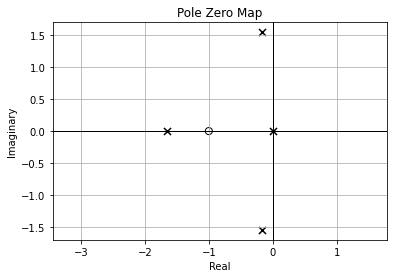

In [ ]:
from control import *
import matplotlib.pyplot as plt


g = tf([1,1],[1,2,3,4, 0])

print('Poles:',g.pole())

print('Zeros:', g.zero())

# Pole-Zero map
poles,zeros = pzmap(g)
ax = plt.gca()
ax.grid()

## Root-Locus Analysis


### Example 1

Poles:[-1.+1.41421356j -1.-1.41421356j  0.+0.j        ]


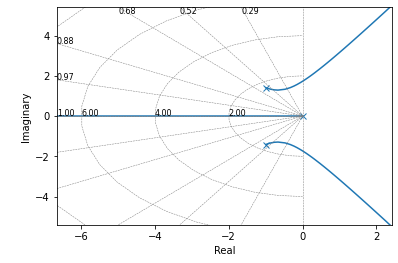

In [ ]:
from control import *
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib qt   # uncomment it on your system to see the qt window
g = tf(1, [1,2,3,0])
k = rlocus(g)
print('Poles:{}'.format(g.pole()))


In [ ]:
import numpy as np
den = [1,6,11,6]
print(np.roots(den))

den2 = [1,2,3]
print(np.roots(den2))

[-3. -2. -1.]
[-1.+1.41421356j -1.-1.41421356j]


shape of rlist:  (100, 3)
shape of klist:  (100,)


<Figure size 432x288 with 0 Axes>

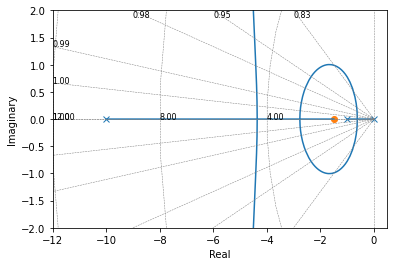

In [ ]:
import numpy as np
from matplotlib import pyplot as plt 
import control

#%matplotlib
fig = plt.figure()
G = control.TransferFunction((1, 1.5), (1, 11, 10, 0))

rlist, klist = control.root_locus(G, kvect=np.linspace(-100,100, num=100),
                              xlim=(-12,0.5), ylim=(-2,2))
#rlist, klist = control.rlocus(G, kvect=np.linspace(-100,100, num=100),
#                              xlim=(-12,0.5), ylim=(-2,2))

print('shape of rlist: ', np.shape(rlist))
print('shape of klist: ', np.shape(klist))

plt.show()


Alternate code for Root Locus. 
Code is take from [this](https://apmonitor.com/pdc/index.php/Main/StabilityAnalysis) link. Original code is modified to work with Google Colab.

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from ipywidgets import *
%matplotlib inline

# open loop
num = [4.0]
den = [1.0,6.0,11.0,6.0]

# open-loop poles and zeroes
sys_zeroes = np.roots(num)
sys_poles = np.roots(den)

# Real & Imag Parts of Poles and zeroes
z_real = [sys_zeroes[i].real for i in range(len(sys_zeroes))]
z_imag = [sys_zeroes[i].imag for i in range(len(sys_zeroes))]
p_real = [sys_poles[i].real for i in range(len(sys_poles))]
p_imag = [sys_poles[i].imag for i in range(len(sys_poles))]


# root locus plot
n = 10000 # number of points to plot
nr = len(den)-1 # number of roots
rs = np.zeros((n,2*nr))   # store results 

# Range of Gain
Kc1 = 0.0
Kc2 = 18.0
Kc = np.linspace(Kc1,Kc2,n)  # Kc values
for i in range(n):        # cycle through n times
  # Characteristic Polynomial
  char_poly = np.polyadd(den, Kc[i]*np.asarray(num))
  # Closed loop poles
  roots = np.roots(char_poly)
  for j in range(nr):   # store roots
      rs[i,j] = roots[j].real # store real
      rs[i,j+nr] = roots[j].imag # store imaginary


def update(K=0):
  indx = (np.abs(Kc-K)).argmin()
  for i in range(nr):
    plt.plot(rs[:,i],rs[:,i+nr],'r.',markersize=2)
    if math.isclose(rs[indx,i+nr], 0.0):
      lbl = '{:.2f}'.format(rs[indx,i])
    else:
      lbl = '{:.2f},{:.2f}i'.format(rs[indx,i], rs[indx,i+nr])
    plt.plot(rs[indx, i], rs[indx,i+nr], 'ks', markersize=5,label=lbl)
    
  # Plot open-loop poles and zeros
  plt.plot(z_real, z_imag, 'bo', markersize=5, label='OL zeroes')
  plt.plot(p_real, p_imag, 'mx', markersize=15, label='OL Poles')
  plt.legend(loc='best')
  plt.xlabel('Root (real)')
  plt.ylabel('Root (imag)')
  plt.grid(b=True, which='major', color='b', linestyle='-',alpha=0.5)
  plt.grid(b=True, which='minor', color='r', linestyle='--',alpha=0.5)

interact(update, K=widgets.FloatSlider(value=Kc1,
                                         min = Kc1,
                                         max = Kc2,
                                         step = 0.1))


interactive(children=(FloatSlider(value=0.0, description='K', max=18.0), Output()), _dom_classes=('widget-inte…

<function __main__.update>

### Example 2 
Draw the root locus for the following system: 
$$G(s) = \frac{K(s+2)}{s^2+2s+3}$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from ipywidgets import *
import math
%matplotlib inline

def update(kvect, rs, nr, p_real, p_imag, z_real, z_imag, xr, yr, K=0):
  indx = (np.abs(kvect-K)).argmin()
  for i in range(nr):
    plt.plot(rs[:,i], rs[:,i+nr],'r.',markersize=2)
    if math.isclose(rs[indx,i+nr], 0.0):
      lbl = '{:.2f}'.format(rs[indx,i])
    else:
      lbl = '{:.2f},{:.2f}i'.format(rs[indx,i], rs[indx,i+nr])
    plt.plot(rs[indx, i], rs[indx,i+nr], 'ks', markersize=5,label=lbl)
  
  if xr is not None:
    plt.xlim(xr)
  if yr is not None:
    plt.ylim(yr)

  # Plot open-loop poles and zeros
  plt.plot(z_real, z_imag, 'bo', markersize=5, label='OL zeroes')
  plt.plot(p_real, p_imag, 'mx', markersize=15, label='OL Poles')
  plt.legend(bbox_to_anchor=(1.05,1.0))
  plt.xlabel('Root (real)')
  plt.ylabel('Root (imag)')
  plt.grid(b=True, which='major', color='b', linestyle='-',alpha=0.5)
  plt.grid(b=True, which='minor', color='r', linestyle='--',alpha=0.5)


def RootLocus(num, den, kvect, xr=None, yr=None):
  '''
  Plots Root Locus of an open-loop transfer function g = tf(num,den)
  for a given gain vector
  '''

  # open-loop poles and zeroes
  sys_zeroes = np.roots(num)
  sys_poles = np.roots(den)

  # Real & Imag Parts of Poles and zeroes
  z_real = [sys_zeroes[i].real for i in range(len(sys_zeroes))]
  z_imag = [sys_zeroes[i].imag for i in range(len(sys_zeroes))]
  p_real = [sys_poles[i].real for i in range(len(sys_poles))]
  p_imag = [sys_poles[i].imag for i in range(len(sys_poles))]

  Kmin = np.min(kvect)
  Kmax = np.max(kvect)

  n = len(kvect) # no. of data points
  nr = len(den) - 1 # no. of roots
  rs = np.zeros((n, 2*nr)) 

  for i in range(n):
    # Characteristic Polynomial
    char_poly = np.polyadd(den, kvect[i]*np.asarray(num))
    # Closed loop poles
    roots = np.roots(char_poly)
    for j in range(nr):
      rs[i,j] = roots[j].real # real part
      rs[i,j+nr] = roots[j].imag  # imaginary part

  # interactive plot
  interact(update, kvect=fixed(kvect),rs=fixed(rs), nr=fixed(nr),\
           p_real = fixed(p_real), p_imag=fixed(p_imag),
           z_real = fixed(z_real), z_imag = fixed(z_imag),
           xr = fixed(xr), yr = fixed(yr),
           K=widgets.FloatSlider(value=Kmin, min = Kmin, 
                                 max = Kmax, step = 0.001))
  return kvect, rs



In [ ]:
num = [1, 2]
den = [1, 2, 3]
K = np.linspace(0,20, 10000)

RootLocus(num, den, K)

interactive(children=(FloatSlider(value=0.0, description='K', max=20.0, step=0.001), Output()), _dom_classes=(…

### Example 3
Draw root locus for the following open loop system:
$$ G(s) = \frac{K}{s(s+0.5)(s^2+0.6s+10)}$$

In [ ]:
# Run the cell block that defines RootLocus() function above
num = [1.]
den = [1., 1.1, 10.3, 5., 0]
K = np.linspace(0, 100, 1000)
RootLocus(num, den, K)

interactive(children=(FloatSlider(value=0.0, description='K', step=0.001), Output()), _dom_classes=('widget-in…

### Example 4
Draw the root locus for the following system
$$G(s) = \frac{K(s^2+2s+4)}{s(s+4)(s+6)(s^2+1.4s+1)}$$

- The system is unstable for some values of K. Hence it is an example of conditionally stable system. 


interactive(children=(FloatSlider(value=0.0, description='K', max=200.0, step=0.001), Output()), _dom_classes=…

shape of r: (10000, 10)
size of r_roots:  (10000, 5)
size of posk_idx: (1771,)
size of posk:  (1771,)
size of negk:  (8229,)


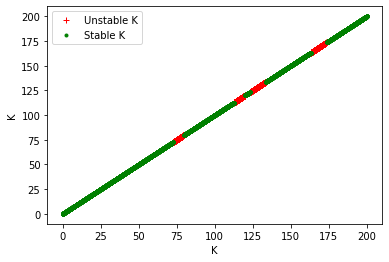

In [ ]:
num = [1., 2., 4.]
den = [1, 11.4, 39., 43.6, 24., 0]
K = np.linspace(0,200,10000)

# Draw Root Locus
k, r = RootLocus(num, den, K)

# Plot stable and Unstable Gains
print('shape of r:', np.shape(r))
nr = len(den) - 1 # no. of roots
r_roots = [r[:,i] for i in range(nr)]
r_roots = np.reshape(r_roots, (len(k), nr))
print('size of r_roots: ', np.shape(r_roots))

posk_idx = np.where(r_roots >= 0)
posk_idx = np.unique(posk_idx[0])
print('size of posk_idx:', np.shape(posk_idx))

posk = k[posk_idx]
negk = np.delete(k, posk_idx, 0)
print('size of posk: ', np.shape(posk))
print('size of negk: ', np.shape(negk))

plt.plot(posk, posk, 'r+', label='Unstable K')
plt.plot(negk, negk, 'g.', label='Stable K' )
plt.xlabel('K')
plt.ylabel('K')
plt.legend(loc='best')



### Controller Design using root locus

**Example 1:** Design a **lead compensator** for the following system

$$G(s) = \frac{4}{s(s+2)} $$

- Add lead compensator to improve transient performance.
- Decide where to add the pole and zeroes
- Addition of Zeroes tend to pull the RL plot towards itself
- Addition of Poles tend to push the RL plot towards right

Controller:
$$G_c(s) = \frac{K(s+3)}{(s+6)}$$


Combined openloop system:
$$G_1 = \frac{4K(s+3)}{s(s+2)(s+6)}$$

 - Now select from the root locus plot to obtain desirable transient properties. 

In [ ]:
num = [4]
den = [1, 2, 0]
K = np.linspace(0,100,1000)
k,r = RootLocus(num, den,K)

interactive(children=(FloatSlider(value=0.0, description='K', step=0.001), Output()), _dom_classes=('widget-in…

In [ ]:
num2 = [4, 12]
den2 = [1, 8, 12, 0]
K2 = np.linspace(0,100, 1000)
k,r = RootLocus(num2, den2, K2)

interactive(children=(FloatSlider(value=0.0, description='K', step=0.001), Output()), _dom_classes=('widget-in…

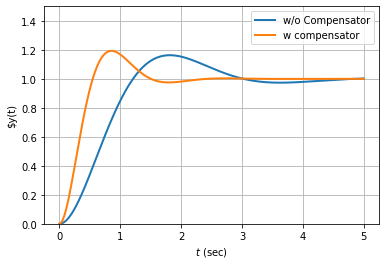

In [ ]:
from control import *
num1 = [4]
den1 = [1, 2, 0]

# open-loop plant
g = tf(num1,den1)

K = 5.0
num2 = [1,3]
den2 = [1,6]

# Controller
c = tf(K*np.asarray(num2), den2)

# Unit feedback system
gc1 = feedback(g,1,-1)
# Closed-loop system with Compensator
gc2 = feedback(series(g,c),1,-1)

t = np.linspace(0,5,1000)
t, y1 = step_response(gc1, t)
t, y2 = step_response(gc2, t)

plt.plot(t, y1, lw = 2, label='w/o Compensator')
plt.plot(t, y2, lw = 2, label='w compensator')
plt.xlabel('$t$ (sec)')
plt.ylabel('$y(t)')
plt.ylim((0,1.5))
plt.grid()
plt.legend(loc='best')



In [ ]:
import math

def time_spec(sigma, wd):
  theta = math.atan(sigma/wd)
  zeta = math.sin(theta)
  ts = 4/sigma
  mp = math.e**(-math.pi*sigma/wd)
  beta = math.atan(wd/sigma)
  tr = (math.pi - beta)/wd 

  print('zeta = {:.2f}'.format(zeta))
  print('Mp = {:.2f}'.format(mp))
  print('ts = {:.2f}'.format(ts))
  print('tr = {:.2f}'.format(tr))

# open-loop dominant poles
print('open-loop transient response paramters:')
sigma1 = 1
wd1 = math.sqrt(3)
time_spec(sigma1, wd1)

print('\n------------\n')

# closed-loop dominant poles
print('closed-loop transient response specs:')
sigma2 = 2.4
wd2 = 8.06
time_spec(sigma2, wd2)

open-loop transient response paramters:
zeta = 0.50
Mp = 0.16
ts = 4.00
tr = 1.21

------------

closed-loop transient response specs:
zeta = 0.29
Mp = 0.39
ts = 1.67
tr = 0.23


**Example 2:** Design a lag compensator for the following system

$$G(s) = \frac{1}{s(s+1)(s+2)}$$

Such that $K_v$ for compensated system becomes 10 times of that for the uncompensated system without changing the dominant poles. 

In [ ]:
num1 = [1]
den1 = [1, 3, 2, 0]
K = np.linspace(0,100,1000)
k,r = RootLocus(num1, den1, K)

# closed-loop poles of uncompensated system
den_c1 = [1, 3, 2,1]
print('Uncompensated CL poles: ',np.roots(den_c1))

interactive(children=(FloatSlider(value=0.0, description='K', step=0.001), Output()), _dom_classes=('widget-in…

Uncompensated CL poles:  [-2.32471796+0.j         -0.33764102+0.56227951j -0.33764102-0.56227951j]


In [ ]:
num_c = [1, 0.05]
den_c = [1, 0.005]

# Gc = G*C
num2 = np.polymul(num_c, num1)
den2 = np.polymul(den_c, den1)
print(num2)
print(den2)
xr = ((-0.4, 0.1))
yr = ((-0.5,0.5))
K = np.linspace(0,100, 50000)
k,r = RootLocus(num2, den2, K, xr, yr)

[1.   0.05]
[1.    3.005 2.015 0.01  0.   ]


interactive(children=(FloatSlider(value=0.0, description='K', step=0.001), Output()), _dom_classes=('widget-in…

In [ ]:
num_c = [1, 0.05]
den_c = [1, 0.005]

# Gc = G*C
num2 = np.polymul(num_c, num1)
den2 = np.polymul(den_c, den1)

K = np.linspace(0,100, 50000)
k,r = RootLocus(num2, den2, K)

interactive(children=(FloatSlider(value=0.0, description='K', step=0.001), Output()), _dom_classes=('widget-in…

In [ ]:
import math
a = 0.05
b = 0.005
thmax = math.atan((b-a)/(2*math.sqrt(a*b)))
print(thmax*180/math.pi)

-54.903198772415415


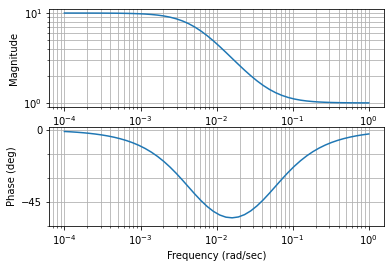

In [ ]:
num = [1, 0.05]
den = [1, 0.005]
g = tf(num,den)
m,p,w = bode(g)

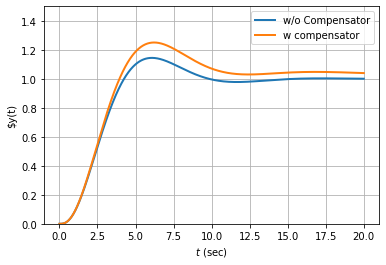

In [ ]:
# Step Response
from control import *
# open-loop plant
num1 = [1]
den1 = [1, 3, 2, 0]
g = tf(num1,den1)

# Controller
K = 1.0
num2 = [1,0.05]
den2 = [1,0.005]
c = tf(K*np.asarray(num2), den2)

# Unit feedback system
gc1 = feedback(g,1,-1)
# Closed-loop system with Compensator
gc2 = feedback(series(g,c),1,-1)

t = np.linspace(0,20,1000)
t, y1 = step_response(gc1, t)
t, y2 = step_response(gc2, t)

plt.plot(t, y1, lw = 2, label='w/o Compensator')
plt.plot(t, y2, lw = 2, label='w compensator')
plt.xlabel('$t$ (sec)')
plt.ylabel('$y(t)')
plt.ylim((0,1.5))
plt.grid()
plt.legend(loc='best')

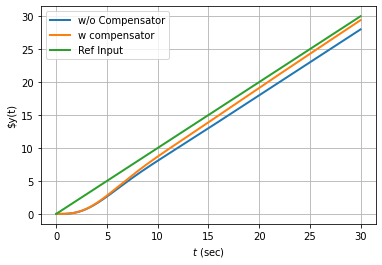

In [ ]:
# Ramp response
from control import *

# open-loop plant
num1 = [1]
den1 = [1, 3, 2, 0]
g = tf(num1,den1)

# Controller
K = 1.0
num2 = [1,0.05]
den2 = [1,0.005]
c = tf(K*np.asarray(num2), den2)

# Unit feedback system
gc1 = feedback(g,1,-1)
# Closed-loop system with Compensator
gc2 = feedback(series(g,c),1,-1)

t = np.linspace(0,30,1000)
u = t
t, y1, x1 = forced_response(gc1, t, u)
t, y2, x2 = forced_response(gc2, t, u)

plt.plot(t, y1, lw = 2, label='w/o Compensator')
plt.plot(t, y2, lw = 2, label='w compensator')
plt.plot(t,u, lw = 2, label='Ref Input')
plt.xlabel('$t$ (sec)')
plt.ylabel('$y(t)')
plt.grid()
plt.legend(loc='best')

In [ ]:

# for K = 1
sigma1 = 0.34
wd1 = 0.56
print('Time Specs for Open-loop system:')
time_spec(sigma1, wd1)

print('\n ---------------\n')
# for K = 1
sigma2 = 0.3
wd2 = 0.6
print('Time Specs for Closed-loop system:')
time_spec(sigma2, wd2)


Time Specs for Open-loop system:
zeta = 0.52
Mp = 0.15
ts = 11.76
tr = 3.78

 ---------------

Time Specs for Closed-loop system:
zeta = 0.45
Mp = 0.21
ts = 13.33
tr = 3.39


## Bode-Plot

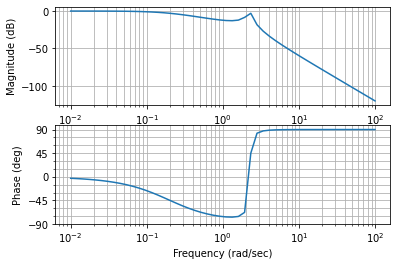

In [ ]:
from control import *

g = tf([1], [1, 0, 5, 1])

mag, ph, w = bode_plot(g, dB=True)

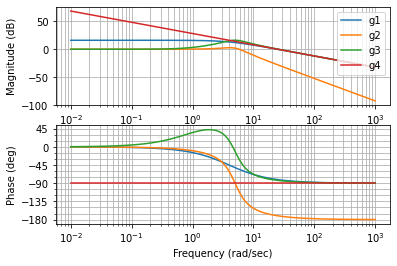

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from control import *

g1 = tf([25],[1, 4])
g2 = tf([25], [1, 4, 25])
g3 = tf([25, 25], [1, 4, 25])
g4 = tf([25], [1,0])
w = np.logspace(-2,3,100)
m,p,w = bode([g1,g2, g3, g4], w, dB=True)
fig = plt.gcf()
fig.axes[0].legend(['g1', 'g2', 'g3', 'g4'], 
                   loc='best')

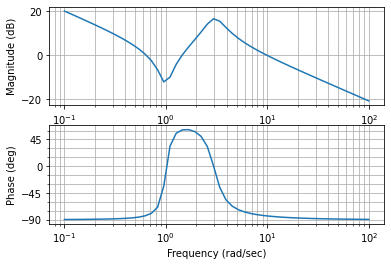

In [ ]:
from control import *
g = tf([9, 1.8, 9], [1, 1.2, 9, 0])
m,p,w = bode(g, dB=True)

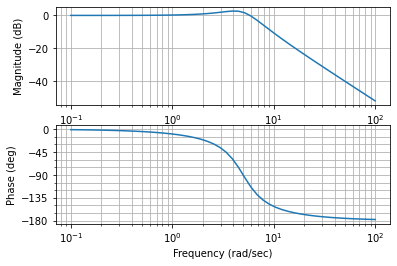

In [ ]:
from control import *
A = [[0,1],[-25,-4]]
B = [[0],[25]]
C = [1, 0]
D = [0]
sys = ss(A,B,C,D)
m,p,w = bode(sys, dB=True)

## Nyquist Plot

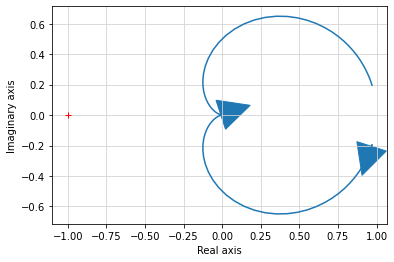

In [ ]:
from control import *
g = tf([1], [1,2,1])
real,imag,w = nyquist_plot(g)

Text(0, 0.5, 'Imag')

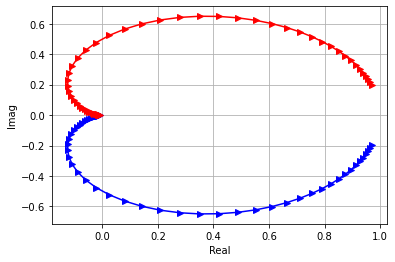

In [ ]:
import matplotlib.pyplot as plt
plt.plot(real,imag, 'b->')
plt.plot(real, -1*imag, 'r<-')
plt.grid()
plt.xlabel('Real')
plt.ylabel('Imag')

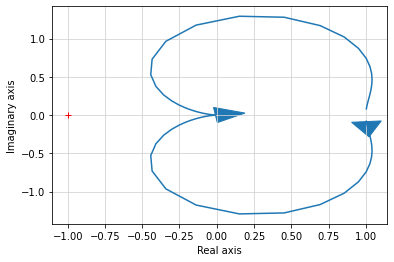

In [ ]:
from control import *
g = tf([1],[1, 0.8, 1])
r,i,w = nyquist(g)

(-1.2, 0.5)

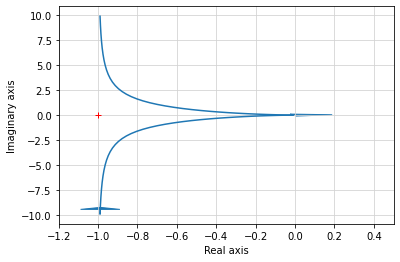

In [ ]:
from control import *
g = tf([1],[1,1,0])
r,i,w = nyquist(g)
plt.xlim((-1.2, 0.5))

### Nyquist Stability Criterion
- Here there are no open-loop poles on RHS of s-plane. Therefore, $P=0$.
- For stability of CL system, there should be any encirclement of -1+j0 point.
- So the CL system is stable. 

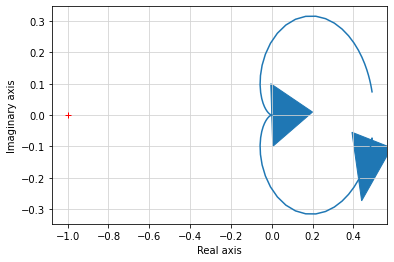

In [ ]:

from control import * 
g = tf([1],[1,3,2])
r,i,w = nyquist(g)

$$G(s) = \frac{K}{s(s+1)(s+2)}$$

- Here also, $P=0$ and hence, for stability $N = -P = 0$.
- Hence the CL system is stable.

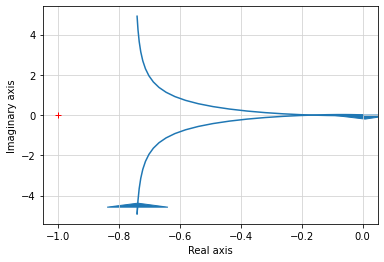

In [ ]:
from control import * 
g = tf([1],[1,3,2,0])
r,i,w = nyquist(g)

Consider the system 
$$G(s) = \frac{K(s+3)}{s(s-1)}$$. 
- Here $P = 1$. Therefore, for stability $N = -1$. The nyquist plot must encircle the point -1+j0 once in clockwise direction.
- For $K=1$,  GH(s) plot passes through -1+j0 and does not encircle it. So the closed-loop system is unstable.
- For $K=2$, GH(s) plot encircles the point -1+j0 in clockwise direction and hence the closed-loop system is stable.



 s + 3
-------
s^2 - s


2 s + 6
-------
s^2 - s


 s + 3
-------
s^2 + 3


  2 s + 6
-----------
s^2 + s + 6



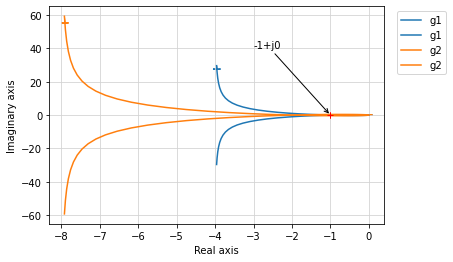

In [ ]:
from control import * 
import matplotlib.pyplot as plt

g1 = tf([1,3],[1, -1, 0])
print(g1)
g2 = tf([2,6],[1, -1, 0])
print(g2)

r1,i1,w1 = nyquist(g1, label='g1')
r2,i2,w2 = nyquist(g2, label='g2')
plt.legend(bbox_to_anchor=(1.2,1.0))
plt.annotate('-1+j0', xy=(-1,0), xytext=(-3,40),
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3", ))
gc1 = feedback(g1,1, -1)
print(gc1)
gc2 = feedback(g2, 1, -1)
print(gc2)

Text(-1.5, 1.2, '-1+j0')

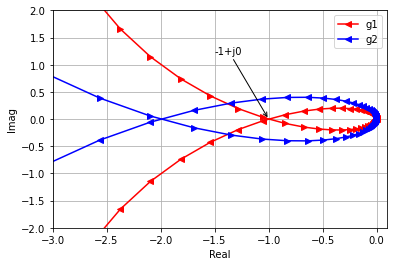

In [ ]:
plt.plot(r1,i1, 'r->')
plt.plot(r1,-1.0*i1, 'r<-', label='g1')
plt.plot(r2, i2, 'b->')
plt.plot(r2, -1.0*i2, 'b<-', label='g2')
plt.xlim((-3,0.1))
plt.ylim((-2,2))
plt.xlabel('Real')
plt.ylabel('Imag')
plt.grid()
plt.legend(loc='best')
plt.annotate('-1+j0', xy=(-1,0), xytext=(-1.5,1.2),
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))

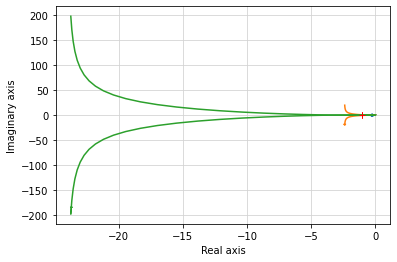

In [ ]:
from control import *
import matplotlib.pyplot as plt

g1 = tf([1],[1,6,5,0])
g2 = tf([10],[1,6,5,0])
g3 = tf([100], [1,6,5,0])
r1,i1,w1 = nyquist(g1)
r2,i2,w2 = nyquist(g2)
r3,i3,w3 = nyquist(g3)

Text(0, 0.5, 'Imag')

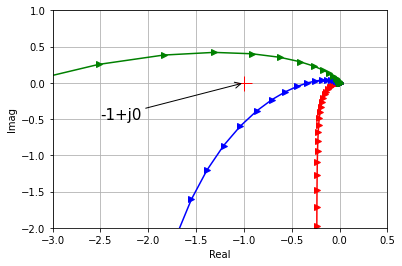

In [ ]:
plt.plot(r1,i1,'r->')
plt.plot(r2,i2,'b->')
plt.plot(r3,i3, 'g->')
plt.plot(-1,0, 'r+', markersize=15)
#plt.text(-1.2,0.6, '-1+j0', fontsize=15)
plt.annotate('-1+j0', xy=(-1,0), xytext=(-2.5,-0.5), 
             fontsize=15, 
             arrowprops=dict(arrowstyle="->",
              connectionstyle="arc3" ) )
plt.ylim((-2,1))
plt.xlim((-3,0.5))
plt.grid()
plt.xlabel('Real')
plt.ylabel('Imag')

### Relative stability of a system

$$G(s) = \frac{K}{s(s+1)(s+5)}$$

GM (dB): 30.00
PM (Deg): 76.66
Wg (rad/s): 0.20
Wp (rad/s): 2.24


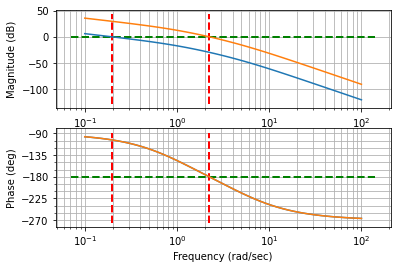

In [ ]:
from control import *
import matplotlib.pyplot as plt
g1 = tf([1], [1, 6, 5, 0])
g2 = tf([30], [1,6,5,0])
m,p,w = bode([g1,g2], dB=True)
#gm,pm,sm,wg,wp,ws = stability_margins(g)
gm, pm, wp, wg = margin(g)
print('GM (dB): {:.2f}\nPM (Deg): {:.2f}\nWg (rad/s): {:.2f}\nWp (rad/s): {:.2f}'\
      .format(gm, pm, wg, wp))
fig = plt.gcf()
xmin, xmax = plt.xlim()
ymin1, ymax1 = fig.axes[0].get_ylim()
ymin2, ymax2 = fig.axes[1].get_ylim()
fig.axes[0].hlines(0, xmin, xmax, colors='g', linestyle='dashed', linewidth=2)
fig.axes[0].vlines(wg, ymin1, ymax1, color='r', linestyle='dashed', linewidth=2)
fig.axes[0].vlines(wp, ymin1, ymax1, color='r', linestyle='dashed', linewidth=2)

fig.axes[1].hlines(-180, xmin, xmax, colors='g', linestyle='dashed', linewidth=2)
fig.axes[1].vlines(wg, ymin2, ymax2, color='r', linestyle='dashed', linewidth=2)
fig.axes[1].vlines(wp, ymin2, ymax2, color='r', linestyle='dashed', linewidth=2)


## Frequency response based Control System Design

- Lead Compensation
- Lag Compensation

### Lead Compensator Design

$$G(s) = \frac{4}{s(s+2)}$$

Design a lead compensator so that $K_v = 20$, phase margin is at least $50^\circ$ and gain margin is at least 10 dB. 

Lead compensator is given by 
$$G_c(s) = \frac{K_c\alpha(Ts+1)}{(\alpha Ts+1)} = \frac{K(Ts+1)}{(\alpha Ts+1)}$$

- Step 1: Compute gain K from steady-state error requirement:
$$K_v = \lim_{s\rightarrow 0} s G_c(s)G(s) = 20$$ This gives $K=10$.

- Step 2: Draw the bode plot for system $KG(s)$. Find PM
- Step 3: The required lead for meeting PM requirement is around $50 - PM = 33 + 5 = 38^\circ$. 
- Step 4: Compute $\alpha$ using the following formula:
$$\sin\phi_m = \frac{1-\alpha}{1+\alpha}$$
This gives $\alpha = 0.24$

- Step 5:  Maximum phase $\phi_m$ occurs at the geometric mean of two corner frequency which gives $\omega_m = \frac{1}{T\sqrt{\alpha}}$.

 So, choose $\omega_m = 9$ rad/s. This gives $ T = 0.227$. Hence, the final compensator is given by
$$G_c(s) = \frac{41.7(s+4.41)}{(s+18.5)}$$

Stability Margins for uncompensated system (K*g1):
GM (dB): inf
PM (Deg): 17.96
Wg (rad/s): 6.17
Wp (rad/s): nan
Stability Margins for compensated system (g2):
GM (dB): inf
PM (Deg): 50.67
Wg (rad/s): 8.86
Wp (rad/s): nan


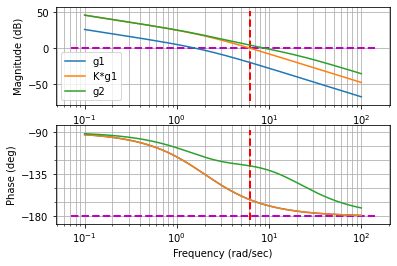

In [ ]:
import matplotlib.pyplot as plt
from control import *
import numpy as np

num1 = [4]
den1 = [1, 2, 0]
# Find K to meet steady-state requirement (Kv)
K = 10
g1 = tf(num1, den1)
g11 = tf(K*np.asarray(num1), den1)
#Controller
c1 = tf(41.7*np.asarray([1, 4.41]), [1, 18.5])
# compensated Open-loop system: Gc(s)G(s)
g2 = series(c1,g1)
w = np.logspace(-1, 2, 1000)
# Bode Plot
m1,p1,w1 = bode([g1,g11, g2], w, dB=True)
#stability margins
gm, pm, wp, wg = margin(g11)
gm2, pm2, wp2, wg2 = margin(g2)

print('Stability Margins for uncompensated system (K*g1):')
print('GM (dB): {:.2f}\nPM (Deg): {:.2f}\nWg (rad/s): {:.2f}\nWp (rad/s): {:.2f}'\
      .format(gm, pm, wg, wp))
print('Stability Margins for compensated system (g2):')
print('GM (dB): {:.2f}\nPM (Deg): {:.2f}\nWg (rad/s): {:.2f}\nWp (rad/s): {:.2f}'\
      .format(gm2, pm2, wg2, wp2))

fig = plt.gcf()
xmin, xmax = plt.xlim()
ymin1, ymax1 = fig.axes[0].get_ylim()
ymin2, ymax2 = fig.axes[1].get_ylim()
fig.axes[0].hlines(0, xmin, xmax, colors='m', linestyle='dashed', linewidth=2)
fig.axes[0].vlines(wg, ymin1, ymax1, color='r', linestyle='dashed', linewidth=2)
fig.axes[0].vlines(wp, ymin1, ymax1, color='r', linestyle='dashed', linewidth=2)
fig.axes[1].hlines(-180, xmin, xmax, colors='m', linestyle='dashed', linewidth=2)
fig.axes[1].vlines(wg, ymin2, ymax2, color='r', linestyle='dashed', linewidth=2)
fig.axes[1].vlines(wp, ymin2, ymax2, color='r', linestyle='dashed', linewidth=2)
fig.axes[0].legend(['g1','K*g1','g2'], loc='lower left')


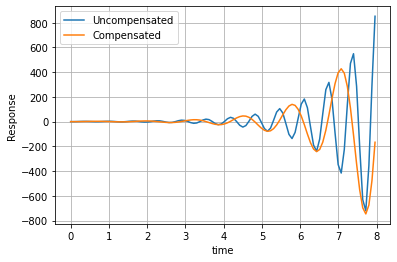

In [ ]:
gc1 = feedback(g1, 1, -1)
gc2 = feedback(series(c1,g1), 1, -1)
t,y1 = step_response(gc1)
t,y2 = step_response(gc2)
plt.plot(t,y1,label='Uncompensated')
plt.plot(t,y2, label='Compensated')
plt.xlabel('time')
plt.ylabel('Response')
plt.grid()
plt.legend(loc='best')

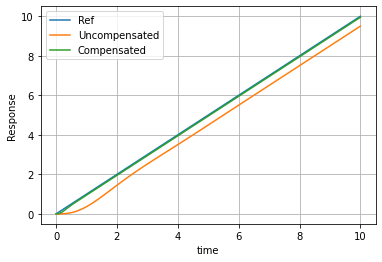

In [ ]:
gc1 = feedback(g1, 1, -1)
gc2 = feedback(series(c1,g1), 1, -1)
t = np.linspace(0,10,100)
u = t
t,y1,x1 = forced_response(gc1,t,u)
t,y2,x2 = forced_response(gc2,t,u)
plt.plot(t,t, label='Ref')
plt.plot(t,y1,label='Uncompensated')
plt.plot(t,y2, label='Compensated')
plt.xlabel('time')
plt.ylabel('Response')
plt.grid()
plt.legend(loc='best')

### Lag Compensator Design

Consider the open-loop system: $G(s) = \frac{1}{s(s+1)(0.5s+1)}$. Design a lag compensator so that the static velocity error constant is 5, the PM is at least $40^\circ$ and GM is at least 10 dB. 

**Solution:**
The compensator is given by $G_c(s) = K_c\beta\frac{Ts+1}{\beta Ts+1} = K\frac{Ts+1}{\beta Ts+1}$, where $K = \beta K_c$. Need to find $K_c$, $\beta$ and $T$. 

1. Compute K from steady-state error condition: $K_v = \lim_{s\rightarrow 0}sG_c(s)G(s) = 5$. This gives $K = 5$.

2. Draw the bode plot of system: $G_1 = KG(s)$. PM is $-13^\circ$, so the system is unstable.

3. Find the frequency where PM of $KG = 40^\circ$. This is around $\omega = 0.7 rad/s$. Choose the zero of compensator at least 1 octave to 1 decade below this frequency. Let's choose zero at $w_z = \frac{1}{T} = 0.1$ rad/s. This gives $T=10$. 

4. Since this corner frequency is close to the new gain cross_over frequency, add a correction of about $12^\circ$ to the required PM which is now about $40+12=52^\circ$. This occurs at $\omega_1 = 0.5$ rad/s. The gain at this frequency is around 20 dB.

5. For $\omega_1$ to be the new gain crossover frequency, the compensator should provide an additional attenuation of -20 dB to bring the composite gain to 0 dB after compensation at this frequency. so 
$ 20 \log \frac{1}{\beta} = -20$. This gives $\beta = 10$.

\begin{array}{l}
20 \log|G_c(j\omega_1)|.|KG(j\omega_1)| = 0\ \text{dB} \\
20 \log |G_c(j\omega_1)| + 20\ \text{dB} = 0\ \text{dB} \\
20 \log \frac{\sqrt{\omega^2T^2 + 1}}{\sqrt{\beta^2\omega^2T^2+1}} = -20\ \text{dB} \\
20 \log \frac{1}{\beta} = -20\ \text{dB} \; (\because \omega T >> 1) \\
\end{array}

6. The pole of compensator is at $\omega_p = \frac{1}{\beta T} = 0.01$ rad/s. 
7. Finally, $K_c = \frac{K}{\beta} = \frac{5}{10} = 0.5$

So our compensator is
$G_c(s) = \frac{5(10s+1)}{(100s+1)}$. 


Stability Margins for uncompensated system (g1):
GM (dB): 0.60
PM (Deg): -13.00
Wg (rad/s): 1.80
Wp (rad/s): 1.41
Stability Margins for compensated system (g2):
GM (dB): 5.19
PM (Deg): 41.61
Wg (rad/s): 0.45
Wp (rad/s): 1.32


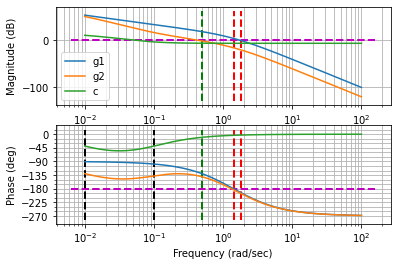

In [ ]:
num1 = [1]
den1 = [0.5, 1.5, 1, 0]

K = 5  # obtained from steady-state error condition
g = tf(num1, den1)
g1 = tf(K*np.asarray(num1), den1)

# Compensator
num2 = [10,1]
den2 = [100, 1]
c = tf(K*np.asarray(num2), den2)

# Compensated System
g2 = series(c, g)

w = np.logspace(-2,2,1000)
m1, p1, w1 = bode([g1,g2,c], w, dB=True)

gm, pm, wp, wg = margin(g1)
gm2, pm2, wp2, wg2 = margin(g2)

print('Stability Margins for uncompensated system (g1):')
print('GM (dB): {:.2f}\nPM (Deg): {:.2f}\nWg (rad/s): {:.2f}\nWp (rad/s): {:.2f}'\
      .format(gm, pm, wg, wp))
print('Stability Margins for compensated system (g2):')
print('GM (dB): {:.2f}\nPM (Deg): {:.2f}\nWg (rad/s): {:.2f}\nWp (rad/s): {:.2f}'\
      .format(gm2, pm2, wg2, wp2))

fig = plt.gcf()
xmin, xmax = plt.xlim()
ymin1, ymax1 = fig.axes[0].get_ylim()
ymin2, ymax2 = fig.axes[1].get_ylim()
fig.axes[0].hlines(0, xmin, xmax, colors='m', linestyle='dashed', linewidth=2)
fig.axes[0].vlines(wg, ymin1, ymax1, color='r', linestyle='dashed', linewidth=2)
fig.axes[0].vlines(wp, ymin1, ymax1, color='r', linestyle='dashed', linewidth=2)

fig.axes[1].hlines(-180, xmin, xmax, colors='m', linestyle='dashed', linewidth=2)
fig.axes[1].vlines(wg, ymin2, ymax2, color='r', linestyle='dashed', linewidth=2)
fig.axes[1].vlines(wp, ymin2, ymax2, color='r', linestyle='dashed', linewidth=2)
fig.axes[0].legend(['g1', 'g2', 'c'], loc='lower left')

wg_new = 0.5 # new gain crossover freq
w1 = 0.1  # corner frequency due to zero
w2 = 0.01 # corner freqency due to pole
fig.axes[0].vlines(wg_new, ymin1, ymax1, color='g', linestyle='dashed', linewidth=2)
fig.axes[1].vlines(wg_new, ymin2, ymax2, color='g', linestyle='dashed', linewidth=2)
fig.axes[1].vlines(w1, ymin2, ymax2, color='k', linestyle='dashed', linewidth=2)
fig.axes[1].vlines(w2, ymin2, ymax2, color='k', linestyle='dashed', linewidth=2)

In [ ]:
# Find the frequency where PM is 40
req_PM1 = 40
phase_new = req_PM - 180 
#print(phase_new*math.pi/180)
wg_idx = np.where(np.isclose(p1, phase_new*math.pi/180.0, rtol=1e-03))
print(w1_idx)
# new gain crossover frequency
w1 = w1[wg_idx[0]]
print(w1[0])
wz = w1[0]   

# compute gain at this new frequency
w_n2 = np.where(np.isclose(w1, wg_n1, rtol=1e-02))
print(w_n2)

(array([416]),)
0.46309028017997395
(array([415, 416, 417]),)


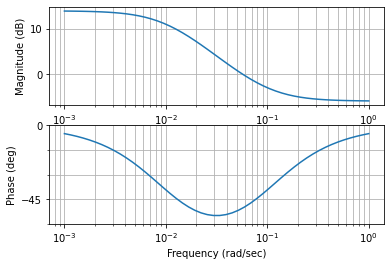

In [ ]:
m3,p3,w = bode(c, dB=True)

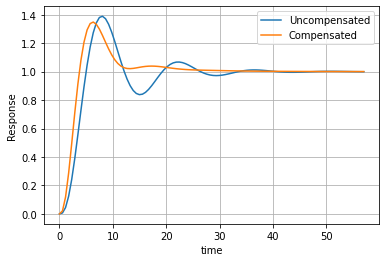

In [ ]:
gc1 = feedback(g, 1, -1)
gc2 = feedback(series(c,g), 1, -1)
t,y1 = step_response(gc1)
t,y2 = step_response(gc2)
plt.plot(t,y1,label='Uncompensated')
plt.plot(t,y2, label='Compensated')
plt.xlabel('time')
plt.ylabel('Response')
plt.grid()
plt.legend(loc='best')

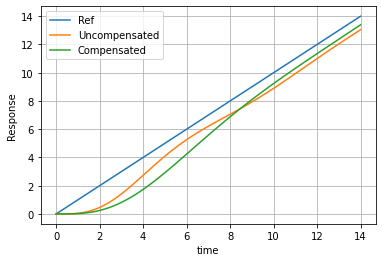

In [ ]:
gc1 = feedback(g, 1, -1)
gc2 = feedback(series(c,g), 1, -1)
t = np.linspace(0,14,100)
u = t
t,y1,x1 = forced_response(gc1,t,u)
t,y2,x2 = forced_response(gc2,t,u)
plt.plot(t,t, label='Ref')
plt.plot(t,y1,label='Uncompensated')
plt.plot(t,y2, label='Compensated')
plt.xlabel('time')
plt.ylabel('Response')
plt.grid()
plt.legend(loc='best')